In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy, pickle, matplotlib

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [2]:
points_bi = [
    [2.9, 2.1], [2.9, 2.5], [2.9, 2.9], [2.9, 3.3],
    [3.3, 2.5], [3.3, 2.9], [3.3, 3.3],
    [3.7, 2.9], [3.7, 3.3],
    [4.1, 3.3],
]

savepath = "../../../../writing/paper2_chaos/opt_phase_shift/images/ss"

def read(filename):
    filehandler = open(filename,"rb")
    results_dict = pickle.load(filehandler)
    filehandler.close()

    return results_dict

In [3]:
filehandler = open("../../data/boundary_bi.pickle","rb")
boundary_bi = pickle.load(filehandler)
filehandler.close()
boundary_bi_e_u = boundary_bi[0][62:]
boundary_bi_i_u = boundary_bi[1][62:]
boundary_bi_e_d = boundary_bi[0][:62]
boundary_bi_i_d = boundary_bi[1][:62]

deu = np.zeros(( len(points_bi) ))
ded = deu.copy()
diu = deu.copy()

for j in range(len(points_bi)):
    for ind in range(len(boundary_bi_i_u)):
        if boundary_bi_i_u[ind] == points_bi[j][1]:
            deu[j] = boundary_bi_e_u[ind] - points_bi[j][0]
    for ind in range(len(boundary_bi_i_d)):
        if boundary_bi_i_d[ind] == points_bi[j][1]:
            ded[j] = points_bi[j][0] - boundary_bi_e_d[ind]

    for ind in range(len(boundary_bi_i_u)):
        if np.abs(boundary_bi_e_u[ind]-0.025 - points_bi[j][0]) < 1e-4:
            diu[j] = points_bi[j][1] - boundary_bi_i_u[ind]
        elif np.abs(boundary_bi_e_u[ind]+0.025 - points_bi[j][0]) < 1e-4:
            diu[j] = points_bi[j][1] - boundary_bi_i_u[ind]

    print(ded[j])


0.125
0.125
0.125
0.125
0.5249999999999999
0.5249999999999999
0.5249999999999999
0.9250000000000003
0.9250000000000003
1.3249999999999997


In [64]:
w1_du = read("l1_du.pickle")
w1_ud = read("l1_ud.pickle")
w2_du = read("l2_du.pickle")
w2_ud = read("l2_ud.pickle")

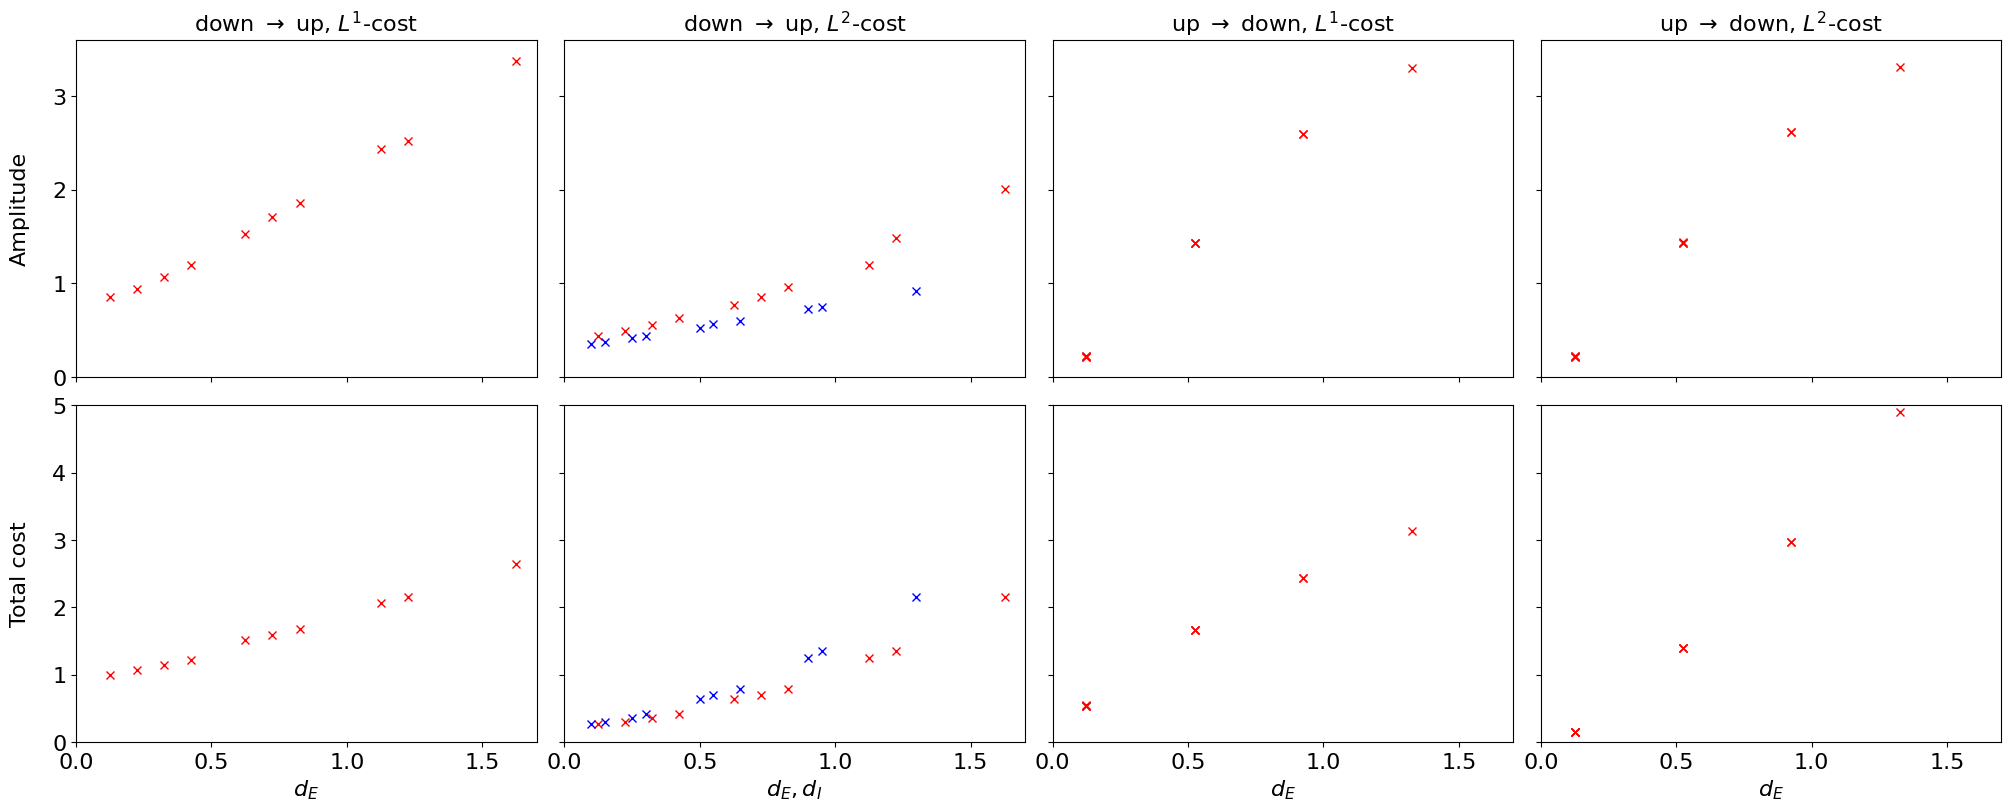

In [66]:
fs_ = 16
plt.rcParams["axes.titlesize"] = fs_
plt.rcParams["axes.labelsize"] = fs_
matplotlib.rc("xtick", labelsize=fs_)
matplotlib.rc("ytick", labelsize=fs_)
plt.rc("legend", fontsize=fs_)

fig, ax = plt.subplots(2, 4, figsize=(20, 8), sharex=True, sharey="row", constrained_layout=True)

dict_list = [w1_du, w2_du, w1_ud, w2_ud]
title_list = [r'down $\rightarrow$ up, $L^1$-cost',
        r'down $\rightarrow$ up, $L^2$-cost',
        r'up $\rightarrow$ down, $L^1$-cost',
        r'up $\rightarrow$ down, $L^2$-cost']

for i in range(len(dict_list)):
    for j in range(len(points_bi)):
        if i in [0,1]:
            ax[0,i].plot(deu[j], np.amax(np.abs(dict_list[i]["control"][j][0,0,:])), marker="x", color="red")
            if i in [1]:
                ax[0,i].plot(diu[j], np.amax(np.abs(dict_list[i]["control"][j][0,1,:])), marker="x", color="blue")
            if i in [0]:
                ax[1,i].plot(deu[j], dict_list[i]["cost"][j], marker="x", color="red")
            elif i in [1]:
                ax[1,i].plot(deu[j], dict_list[i]["cost"][j], marker="x", color="red")
                ax[1,i].plot(diu[j], dict_list[i]["cost"][j], marker="x", color="blue")
        elif i in [2,3]:
            ax[0,i].plot(ded[j], np.amax(np.abs(dict_list[i]["control"][j][0,0,:])), marker="x", color="red")
            ax[1,i].plot(ded[j], dict_list[i]["cost"][j], marker="x", color="red")

    ax[0,i].set_title(title_list[i])

    ax[0,i].set_xlim(0., 1.7)
    ax[1,i].set_xlim(0., 1.7)

    ax[1,i].set_xticks(np.arange(0., 1.8, 0.5))
    ax[1,i].set_xlabel(r"$d_E$")

ax[1,1].set_xlabel(r"$d_E, d_I$")

ax[0,0].set_ylabel(r"Amplitude")
ax[1,0].set_ylabel(r"Total cost")
ax[0,0].yaxis.set_label_coords(-0.1,0.5)
ax[1,0].yaxis.set_label_coords(-0.1,0.5)
ax[1,0].set_ylim(0., 5.)
ax[0,0].set_ylim(0., 3.6)

plt.savefig(os.path.join(savepath, "ac_dist.png"))
plt.show()


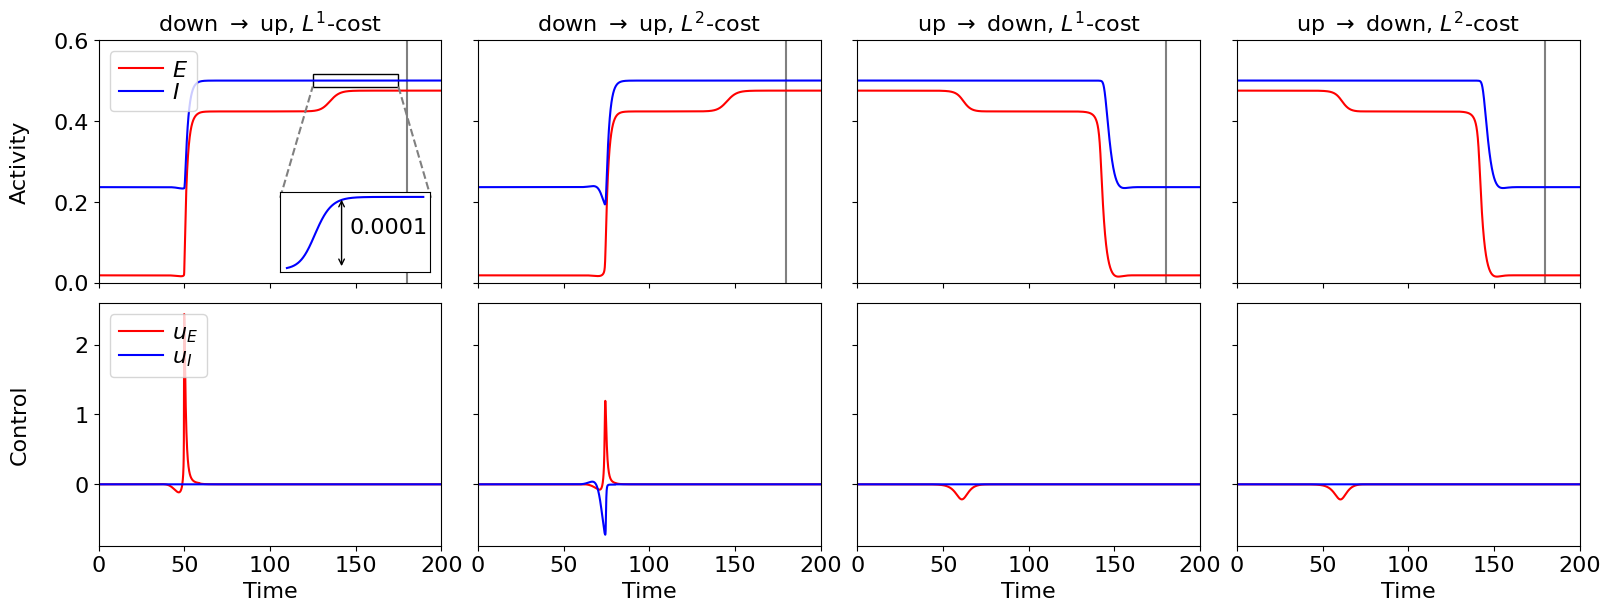

In [49]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

dict_list = [w1_du, w2_du, w1_ud, w2_ud]

duration, dt = 200., 0.1
time = np.arange(0, duration+dt, dt)

for ind_ in range(10):

    if ind_ != 2:
        continue

    fig, ax = plt.subplots(2, 4, figsize=(16, 6), sharey="row", sharex="col", constrained_layout=True)

    for i in range(len(dict_list)):
        ax[0,i].plot(time, dict_list[i]["state"][ind_][0,0,:2001], color="red", label=r"$E$")
        ax[0,i].plot(time, dict_list[i]["state"][ind_][0,1,:2001], color="blue", label=r"$I$")
        ax[1,i].plot(time, dict_list[i]["control"][ind_][0,0,:2001], color="red", label=r"$u_E$")
        ax[1,i].plot(time, dict_list[i]["control"][ind_][0,1,:2001], color="blue", label=r"$u_I$")

        ax[0,i].set_title(title_list[i])

        ax[0,i].set_xlim(0., duration)
        ax[1,i].set_xlim(0., duration)

        #ax[0,i].set_xticks([])
        #ax[1,i].set_xticks(np.arange(0., 201, 50))

        ax[0,i].set_ylim(0., 0.6)
        #ax[1,i].set_ylim(-1., 3.5)

        #if i != 0:
        #    ax[0,i].set_yticks([])
        #    ax[1,i].set_yticks([])
        #else:
        #    ax[0,i].set_yticks(np.arange(0., 0.7, 0.2))
        #    ax[1,i].set_yticks(np.arange(-1., 3.1, 1.))

        ax[1,i].set_xlabel("Time")
        ax[0,i].vlines(180., 0., 0.6, color="grey")

    ax[0,0].legend(loc="upper left", labelspacing=0.1, handletextpad=0.4)
    ax[1,0].legend(loc="upper left", labelspacing=0.1, handletextpad=0.4)

    ax[0,0].set_ylabel("Activity")
    ax[1,0].set_ylabel("Control")
    ax[0,0].yaxis.set_label_coords(-0.2,0.5)
    ax[1,0].yaxis.set_label_coords(-0.2,0.5)

    axins = inset_axes(ax[0,0], width=1.5, height=0.8, loc="lower right")

    xlim = [125, 175]
    ylimbox = [0.485, 0.515]
    ylim = [ dict_list[0]["state"][ind_][0,1,1225], dict_list[0]["state"][ind_][0,1,1750]]

    arrowannotation = np.round(dict_list[0]["state"][ind_][0,1,1750] - dict_list[0]["state"][ind_][0,1,1225], 4)

    axins.set_xticks([])
    axins.set_yticks([])
    axins.set_ylim((1.- 1e-5) * ylim[0], (1. + 2. * 1e-5) * ylim[1])
    axins.plot(time[np.around(xlim[0]/dt).astype(int):np.around(xlim[1]/dt).astype(int)],
                    dict_list[0]["state"][ind_][0,1,np.around(xlim[0]/dt).astype(int):np.around(xlim[1]/dt).astype(int)], color="blue")
    axins.annotate("", xy=(145, ylim[0]), xytext=(145, ylim[1]), arrowprops=dict(arrowstyle="<->"))
    axins.annotate(str(arrowannotation), xy=(148,np.mean(ylim)),  xytext=(148,np.mean(ylim)), fontsize=fs_)

    ax[0,0].add_patch(plt.Rectangle((xlim[0], ylimbox[0]), xlim[1]-xlim[0], ylimbox[1]-ylimbox[0], lw=1., ec="black", fc="None",
                           ))

    ax[0,0].plot([106, xlim[0]], [0.21, ylimbox[0]], color="grey", linestyle="--")
    ax[0,0].plot([xlim[1], 194], [ylimbox[0], 0.21], color="grey",  linestyle="--")

    plt.savefig(os.path.join(savepath, "traces_" + str(ind_) + ".png"))
    plt.show()

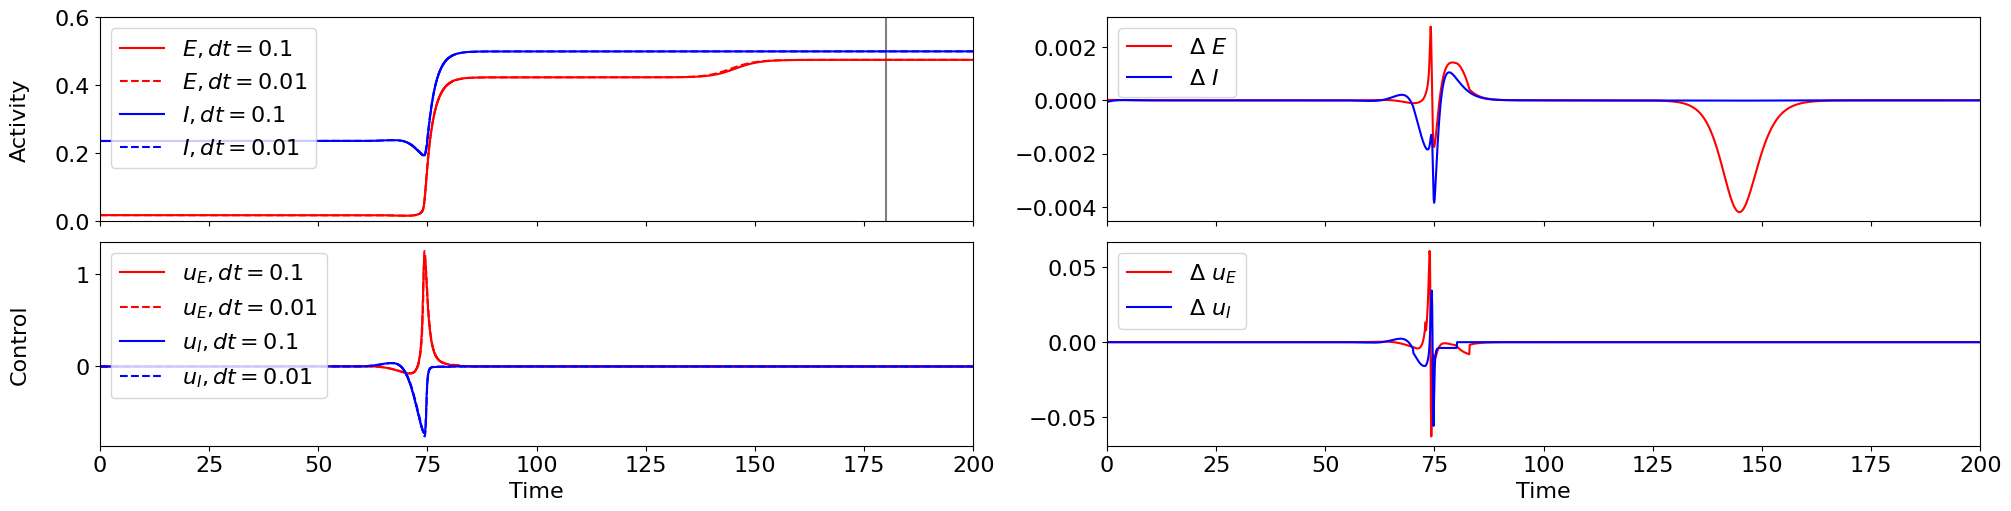

0.004196860869764063 0.008835660660872817
0.0038464859999868817 0.007693939858598952
0.06290835040378528 0.0526268981749623
0.055917015093204736 0.07751156951483718


In [110]:
w2_du_dt = read("l2_du_dt.pickle")
duration, dt = 200., 0.01
time = np.arange(0, duration+dt, dt)

t1 = w2_du["state"][2]
c1 = w2_du["control"][2]
t2 = w2_du_dt["state"][2]
c2 = w2_du_dt["control"][2]

t1_transform = np.zeros((t2.shape))
c1_transform = np.zeros((c2.shape))

for t in range(t1.shape[2]-1):
    for i in range(10):
        t1_transform[:,:,10*t+i] = t1[:,:,t]
        c1_transform[:,:,10*t+i] = c1[:,:,t]

t1_transform[:,:,-1] = t1_transform[:,:,-2]

fig, ax = plt.subplots(2, 2, figsize=(20, 5), sharex=True, constrained_layout=True)

ax[0,0].plot(time, t1_transform[0,0,:], color="red", label=r"$E, dt=0.1~$")
ax[0,0].plot(time, t2[0,0,:], color="red", linestyle="--", label=r"$E, dt=0.01~$")
ax[0,0].plot(time, t1_transform[0,1,:], color="blue", label=r"$I, dt=0.1~$")
ax[0,0].plot(time, t2[0,1,:], color="blue", linestyle="--", label=r"$I, dt=0.01~$")

ax[1,0].plot(time, c1_transform[0,0,:], color="red", label=r"$u_E, dt=0.1~$")
ax[1,0].plot(time, c2[0,0,:], color="red", linestyle="--", label=r"$u_E, dt=0.01~$")
ax[1,0].plot(time, c1_transform[0,1,:], color="blue", label=r"$u_I, dt=0.1~$")
ax[1,0].plot(time, c2[0,1,:], color="blue", linestyle="--", label=r"$u_I, dt=0.01~$")

ax[0,1].plot(time[3:-1:10], t1_transform[0,0,3:-1:10]- t2[0,0,3:-1:10], color="red", label=r"$\Delta ~ E$")
ax[0,1].plot(time[3:-1:10], t1_transform[0,1,3:-1:10]- t2[0,1,3:-1:10], color="blue", label=r"$\Delta ~ I$")

ax[1,1].plot(time[18:-1:10], c1_transform[0,0,18:-1:10] - c2[0,0,18:-1:10], color="red", label=r"$\Delta ~ u_E$")
ax[1,1].plot(time[18:-1:10], c1_transform[0,1,18:-1:10] - c2[0,1,18:-1:10], color="blue", label=r"$\Delta ~ u_I$")


ax[0,0].set_xlim(0., duration)

ax[1,0].set_xlabel("Time")
ax[1,1].set_xlabel("Time")
ax[0,0].set_ylim(0., 0.6)
ax[0,0].vlines(180., 0., 0.6, color="grey")

ax[0,0].legend(loc="upper left")
ax[1,0].legend(loc="upper left")
ax[0,1].legend(loc="upper left")
ax[1,1].legend(loc="upper left")

ax[0,0].set_ylabel("Activity")
ax[1,0].set_ylabel("Control")
ax[0,0].yaxis.set_label_coords(-0.08,0.5)
ax[1,0].yaxis.set_label_coords(-0.08,0.5)

plt.savefig(os.path.join(savepath, "traces_dt_ud2.png"))
plt.show()

ediffmax = np.amax( np.abs(t1_transform[0,0,3:-1:10]- t2[0,0,3:-1:10] ) )
ediffmaxrel = ediffmax / t1[0,0,-1] 
idiffmax = np.amax( np.abs(t1_transform[0,1,3:-1:10]- t2[0,1,3:-1:10]) )
idiffmaxrel = idiffmax / t1[0,1,-1] 
print(ediffmax, ediffmaxrel)
print( idiffmax, idiffmaxrel)

ediffmax = np.amax( np.abs(c1_transform[0,0,18:-1:10]- c2[0,0,18:-1:10] ) )
ediffmaxrel = ediffmax / np.amax(np.abs(c1[0,0,:] ))
idiffmax = np.amax( np.abs(c1_transform[0,1,18:-1:10]- c2[0,1,18:-1:10]) )
idiffmaxrel = idiffmax / np.amax(np.abs(c1[0,1,:] ))
print(ediffmax, ediffmaxrel)
print( idiffmax, idiffmaxrel)

In [322]:

diffact = np.zeros((2, t1.shape[2]))
diffcon = np.zeros((2, t1.shape[2]))
for t in range(t1.shape[2]):
    diffact[0,t] = (t1_transform[0,0,10*t]- t2[0,0,10*t])
    diffact[1,t] = (t1_transform[0,1,10*t]- t2[0,1,10*t])
    diffcon[0,t] = (c1_transform[0,0,10*t] - c2[0,0,10*t])
    diffcon[1,t] = (c1_transform[0,1,10*t] - c2[0,1,10*t])


print(np.amax(np.abs(diffact[0,:])), np.abs(np.amax(diffact[1,:])))
print(np.amax(np.abs(diffcon[0,:])), np.abs(np.amax(diffcon[1,:])))

maxact = np.amax(diffact[0,:])
indmaxact = np.where(diffact[0,:] == maxact)
print(indmaxact, t1_transform[0,0,indmaxact], diffact[0,indmaxact]/t1_transform[0,0,indmaxact])

0.005576685358692733 0.0020352485703476475
0.20902328805585568 0.06805558819826207
(array([742]),) [[0.01826254]] [[0.30536196]]


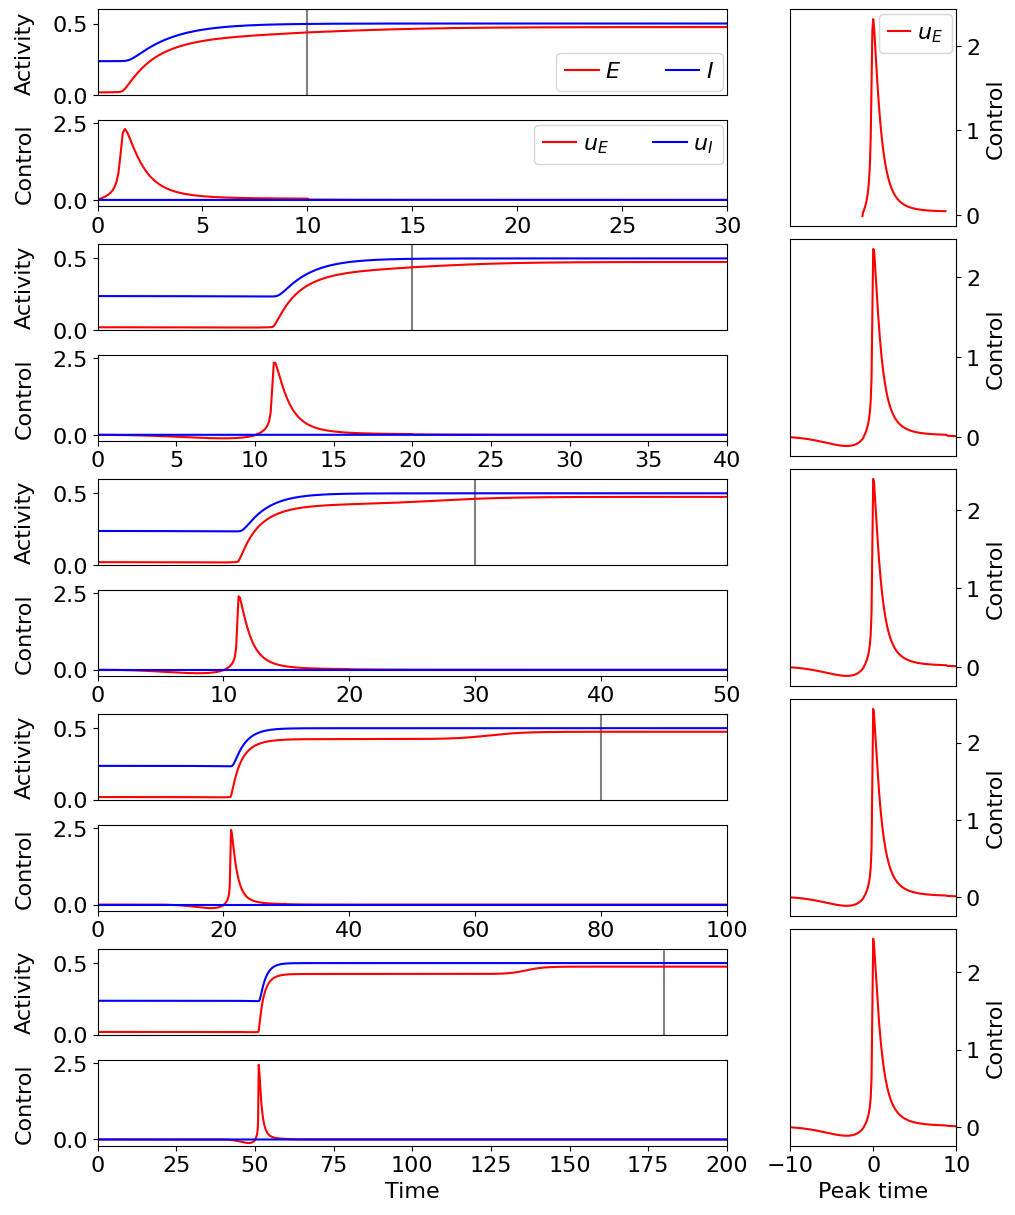

In [108]:
w1_du_T = read("w1_du_T.pickle")
duration, dt = np.array([30, 40, 50, 100, 200]), 0.1

state = w1_du_T["state"]
control = w1_du_T["control"]

fig = plt.figure(figsize=(10,12), constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=0.02, width_ratios=[3., 1.])
axs0 = subfigs[0].subplots(10,1)
axs1 = subfigs[1].subplots(5, 1)

peaktime = np.arange(-10, 10+dt, dt)

from scipy.signal import find_peaks

for i in range(5):
    time = np.arange(0, duration[i]+dt, dt)

    axs0[2*i].plot(time, state[i][0,0,:], color="red", label=r"$E$")
    axs0[2*i].plot(time, state[i][0,1,:], color="blue", label=r"$I$")
    axs0[2*i+1].plot(time, control[i][0,0,:], color="red", label=r"$u_E$")
    axs0[2*i+1].plot(time, control[i][0,1,:], color="blue", label=r"$u_I$")

    axs0[2*i].set_xlim(0., duration[i])
    axs0[2*i+1].set_xlim(0., duration[i])
    axs0[2*i].set_ylim(0., 0.6)

    axs0[2*i].vlines(duration[i]-20, 0., 0.6, color="grey")

    axs0[2*i].set_xticks([])

    axs0[2*i].set_ylabel("Activity")
    axs0[2*i+1].set_ylabel("Control")

    axs0[2*i].yaxis.set_label_coords(-0.1,0.5)
    axs0[2*i+1].yaxis.set_label_coords(-0.1,0.5)

    axs0[2*i].set_ylim(0., 0.6)
    axs0[2*i+1].set_ylim(-0.2, 2.6)

    peakind = find_peaks(control[i][0,0,:], height=1)[0][0]

    if i in [0]:
        pt0 = np.arange(-0.1*peakind, 10.-0.1*peakind+dt, dt)
        axs1[i].plot(pt0, control[i][0,0,0:len(pt0)], color="red", label=r"$u_E$")
        axs1[i].set_xlim(-10,10)
    else:
        axs1[i].plot(peaktime, control[i][0,0,peakind-100:peakind+101], color="red")
        axs1[i].set_xlim(-10, 10)
    axs1[i].set_ylabel("Control")

    if i not in [4]:
        axs1[i].set_xticks([])

    axs1[i].yaxis.tick_right()
    axs1[i].yaxis.set_label_position("right")

axs0[-1].set_xlabel("Time")
axs1[-1].set_xlabel("Peak time")

axs0[0].legend(loc="lower right", ncol=2, borderaxespad=0.2, handlelength=1.5, labelspacing=0.2, handletextpad=0.3)
axs0[1].legend(loc="upper right", ncol=2, borderaxespad=0.2, handlelength=1.5, labelspacing=0.2, handletextpad=0.3)

axs1[0].legend(loc="upper right", borderaxespad=0.2, handlelength=1, labelspacing=0.2, handletextpad=0.3)

plt.savefig(os.path.join(savepath, "ss_traces_T.png"))
plt.show()